In [ ]:
import pandas as pd

#loading the dataset
df=pd.read_csv("brain_stroke.csv")
print(df.shape)

(4981, 11)


In [ ]:
#Checking missing values
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:

#Removing categorical features
from sklearn.preprocessing import LabelEncoder
df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]=df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


[0 1] [4733  248]


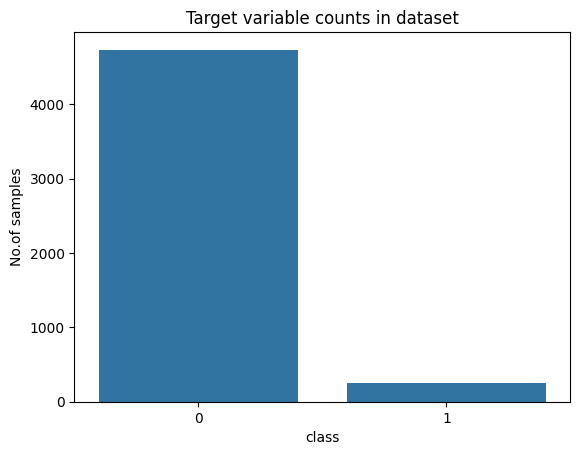

In [ ]:
#Target variable splitted
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


(unique, counts) = np.unique(df['stroke'], return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y=counts)


plt.xlabel("class")
plt.ylabel("No.of samples")
plt.xticks()
plt.title('Target variable counts in dataset')
plt.show()

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [ ]:
#traning and test sets splitted with test set size 0.7
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.7,random_state=42)

classification_report: Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3324
           1       0.11      0.16      0.13       163

    accuracy                           0.90      3487
   macro avg       0.53      0.55      0.54      3487
weighted avg       0.92      0.90      0.91      3487

ROC_AUC_SCORE is 0.5469627841391479


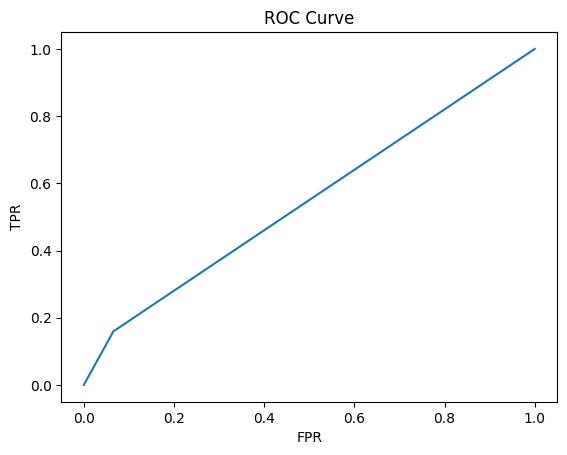

classification_report: KNN
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3324
           1       0.08      0.01      0.02       163

    accuracy                           0.95      3487
   macro avg       0.52      0.50      0.50      3487
weighted avg       0.91      0.95      0.93      3487

ROC_AUC_SCORE is 0.5026752822012063


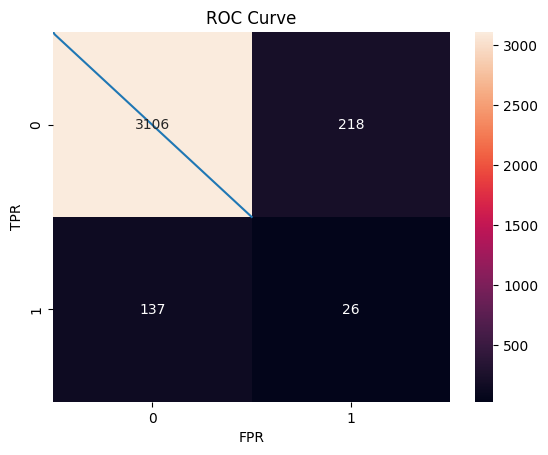

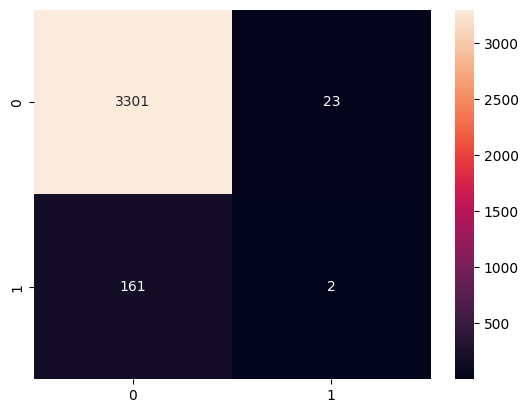

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix


models = {}

models['Decision Tree'] = DecisionTreeClassifier()
models['KNN'] = KNeighborsClassifier()


accuracy, precision, recall, f1= {}, {}, {}, {}


for key in models.keys():
    models[key].fit(X_train, Y_train)
    predictions = models[key].predict(X_val)

    accuracy[key] = accuracy_score(predictions, Y_val)
    precision[key] = precision_score(predictions, Y_val)
    recall[key] = recall_score(predictions, Y_val)
    f1[key] = f1_score(predictions, Y_val)
    Y_predict = models[key].predict(X_val)
    #auc = roc_auc_score(X_val, Y_predict)
    print('classification_report:', key)
    print(classification_report(Y_val, predictions))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_val, predictions)
    print('ROC_AUC_SCORE is',roc_auc_score(Y_val, predictions))

    plt.plot(false_positive_rate, true_positive_rate, label=key)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()
    sns.heatmap(confusion_matrix(Y_val,predictions),fmt='',annot=True)


In [ ]:
#Metrics displayed
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1-Score
Decision Tree,0.898193,0.159509,0.106557,0.127764
KNN,0.947233,0.012270,0.080000,0.021277


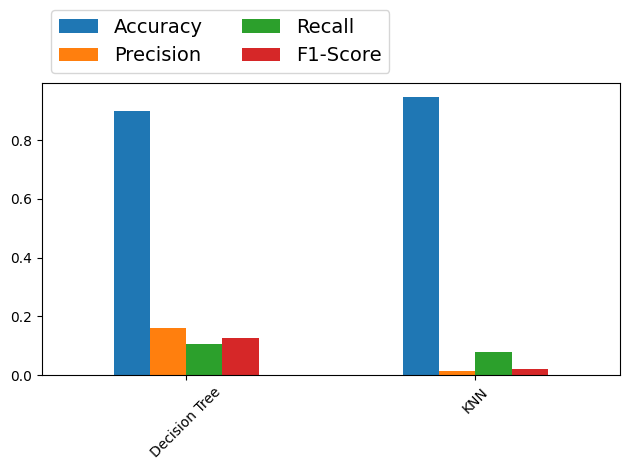

In [ ]:
#Evaluation with plotted graph
ax = df_model.plot.bar(rot=45)
ax.legend(ncol=len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

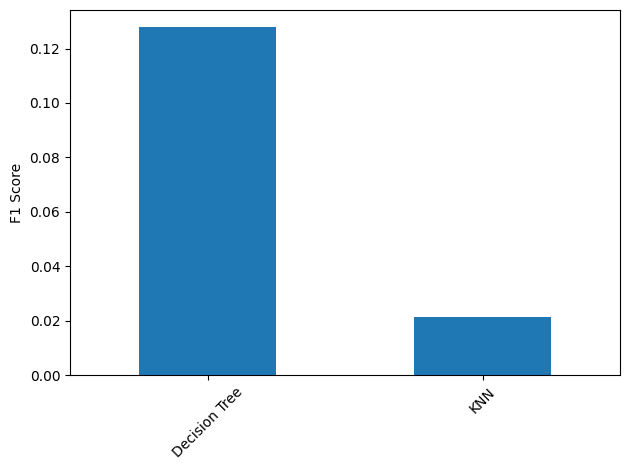


Best model based on F1 score is Decision Tree with a score of 0.1278


In [ ]:
#Evaluation based on F1 score and model
ax = df_model['F1-Score'].plot.bar(x='Model', y='F1 Score', rot=45, legend=False)
ax.set_ylabel('F1 Score')
plt.tight_layout()
plt.show()

best_classifier = df_model['F1-Score'].idxmax()
print(f'\nBest model based on F1 score is {best_classifier} with a score of {f1[best_classifier]:.4f}')